# Module & Load Datasets

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Load the datasets
saving_transaction_history_df = pd.read_csv('saving_transaction_history(in).csv')
loan_information_df = pd.read_csv('loan_information(in).csv')
loan_schedule_with_transaction_history_df = pd.read_csv('loan_schedule_with_transaction_history(in).csv')
member_information_df = pd.read_csv('member_information(in).csv')

C:\Users\sajee\AppData\Local\Temp\ipykernel_12416\3949539578.py:2: DtypeWarning: Columns (28,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  saving_transaction_history_df = pd.read_csv('saving_transaction_history(in).csv')
C:\Users\sajee\AppData\Local\Temp\ipykernel_12416\3949539578.py:4: DtypeWarning: Columns (33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_schedule_with_transaction_history_df = pd.read_csv('loan_schedule_with_transaction_history(in).csv')


In [20]:
saving_transaction_history_df.head()

,id,branch_id,emp_id,center_id,member_id,app_collection_id,member_code,member_name,member_primary_product_id,saving_product_id,...,branch_id_old,emp_id_old,center_id_old,member_id_old,app_collection_id_old,member_code_old,member_primary_product_id_old,saving_product_id_old,saving_id_old,saving_code_old
0,2132385,300,13896,28479,618349,0,0469-020-0704,Ismil,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2132369,300,12383,24714,585998,0,0469-008-0006,Morzna,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2132370,300,12383,24714,585998,0,0469-008-0006,Morzna,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6802587,300,2,24714,585998,0,0469-008-0006,Morzna,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6810023,300,2,24714,585998,0,0469-008-0006,Morzna,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
saving_transaction_history_df.shape

(120429, 48)

In [22]:
loan_information_df.head()

,id,member_code,member_id,disbursment_date,loan_code,amount,installment_amount,first_installment_date
0,842259,0469-030-0001,588138,7/16/2015,JAGORON-0469-030-0001-1,40000,1000,8/5/2015
1,842615,0469-030-0004,588060,8/17/2015,JAGORON-0469-030-0004-1,35000,875,9/2/2015
2,895655,0469-037-0004,595807,7/30/2015,JAGORON-0469-037-0004-1,30000,750,8/16/2015
3,896429,0469-027-0020,705759,2/20/2016,JAGORON-0469-027-0020-1,20000,500,3/8/2016
4,899682,0469-001-0722,701910,12/17/2013,AGROSOR-0469-001-0722-1,100000,9500,1/18/2014


In [23]:
loan_information_df.shape

(2965, 8)

# Identify Members Who Have Savings

In [24]:
# saving transactions with transaction_type 1 or 2
savings_df = saving_transaction_history_df[saving_transaction_history_df['transaction_type'].isin([1, 2])]

# Get unique member IDs who have savings
members_with_savings = savings_df['member_id'].unique()

In [25]:
print(members_with_savings)

[ 618349  585998 1045974 ... 7681560 7681645 7681662]


In [26]:
members_with_savings.shape

(2764,)

In [27]:
savings_df.shape

(113101, 48)

# Identify Members Who Have Loans

In [29]:
# Get the member_ids from the loan_information and loan_schedule_with_transaction_history datasets
members_with_loans = pd.concat([
    pd.Series(loan_information_df['member_id'].unique()),  # Convert to pandas Series
    pd.Series(loan_schedule_with_transaction_history_df['member_id'].unique())  # Convert to pandas Series
])

# Display the first few member IDs with loans
print(members_with_loans)

0        588138
1        588060
2        595807
3        705759
4        701910
         ...   
2304    7587780
2305    7601459
2306    7570851
2307    7636611
2308    7639817
Length: 4653, dtype: int64


# Find Members Who Have Savings but No Loans

In [30]:
# Step 3: Find members with savings but no loans
members_with_savings_but_no_loans = list(set(members_with_savings) - set(members_with_loans))

# Display the members with savings but no loans
print(members_with_savings_but_no_loans)

[3092497, 3823635, 6793237, 6524952, 1962013, 6373415, 5738535, 6174760, 6672426, 7655471, 5638193, 5081143, 6443063, 3874878, 7112769, 4532291, 5982282, 3563600, 7233622, 6490202, 6051937, 6221923, 5226596, 5404772, 1011814, 2226291, 7225461, 5982335, 5884038, 2869385, 7116945, 3092626, 7018644, 1869974, 5306523, 6252700, 5404828, 3412129, 5824678, 7202983, 7147687, 4747447, 4145336, 6226105, 5173432, 7002299, 6926526, 5048511, 3758278, 3551437, 6590671, 4577491, 5824729, 7579865, 2752731, 7622874, 2783457, 3287276, 4380911, 4147443, 6906102, 5413115, 2558206, 6590719, 5961983, 6629633, 6494467, 6273284, 4380934, 5738765, 585998, 7018770, 6807829, 4153625, 3227934, 4204834, 3574051, 6799652, 6320423, 5896488, 2879790, 3678512, 7639350, 6682938, 6828348, 6492477, 6052161, 5841224, 5876044, 6043987, 3201370, 7102813, 5984612, 6494572, 7592307, 5874040, 6123896, 3770750, 5841279, 6807936, 6893959, 7604620, 7639437, 4376985, 6044061, 5577133, 6099379, 7158195, 3353013, 5321142, 7076280, 5

In [32]:
len(members_with_savings_but_no_loans)

531

# Full Member Details

In [40]:
# Step 4: Get member details for those who have savings but no loans
members_details_with_savings_but_no_loans = member_information_df[member_information_df['id'].isin(members_with_savings_but_no_loans)]

# Specify the columns you want to display
columns_to_display = ['id', 'name', 'status', 'admission_date']  # 'code'

# Display the selected columns for the members with savings but no loans
members_details_with_savings_but_no_loans_selected = members_details_with_savings_but_no_loans[columns_to_display]

# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Ensure it doesn't truncate wide data

# Display the selected columns
print(members_details_with_savings_but_no_loans_selected)

           id                       name       status admission_date
0      585998                     Morzna  Transferred     11/12/2012
15     613353                    Hwmayon     Activate      1/22/2012
17     613510                     Rojina  Transferred       1/2/2016
18     613782                       Yiti     Activate     11/11/2015
19     615553                     Samoli  Transferred      6/15/2015
20     615636                     Ajmari     Activate      8/13/2015
21     618313                   Tahamena       closed      5/14/2014
22     618349                      Ismil  Transferred      7/19/2014
27     697483                       Ranu  Transferred     12/17/2014
31     707671                      Jamal  Transferred       5/2/2015
35     746603                      Sopna  Transferred      4/10/2016
36     819840                     Kulsum  Transferred      5/11/2016
44    1000733                      Sufia     Activate      9/21/2016
45    1011814                     

# Visualization

In [43]:
# import matplotlib.pyplot as plt

# # Get the total number of members with savings but no loans
# num_members_with_savings_but_no_loans = len(members_details_with_savings_but_no_loans)

# # Get the total number of members in the dataset
# total_members = len(member_information_df)

# # Prepare the data for the bar chart
# categories = ['Members with Savings but No Loans', 'Other Members']
# counts = [num_members_with_savings_but_no_loans, total_members - num_members_with_savings_but_no_loans]

# # Plot the bar chart
# plt.figure(figsize=(10, 6))
# plt.bar(categories, counts, color=['green', 'orange'])

# # Add labels and title
# plt.xlabel('Category')
# plt.ylabel('Number of Members')
# plt.title('Number of Members with Savings but No Loans')

# # Show the plot
# plt.tight_layout()
# plt.show()

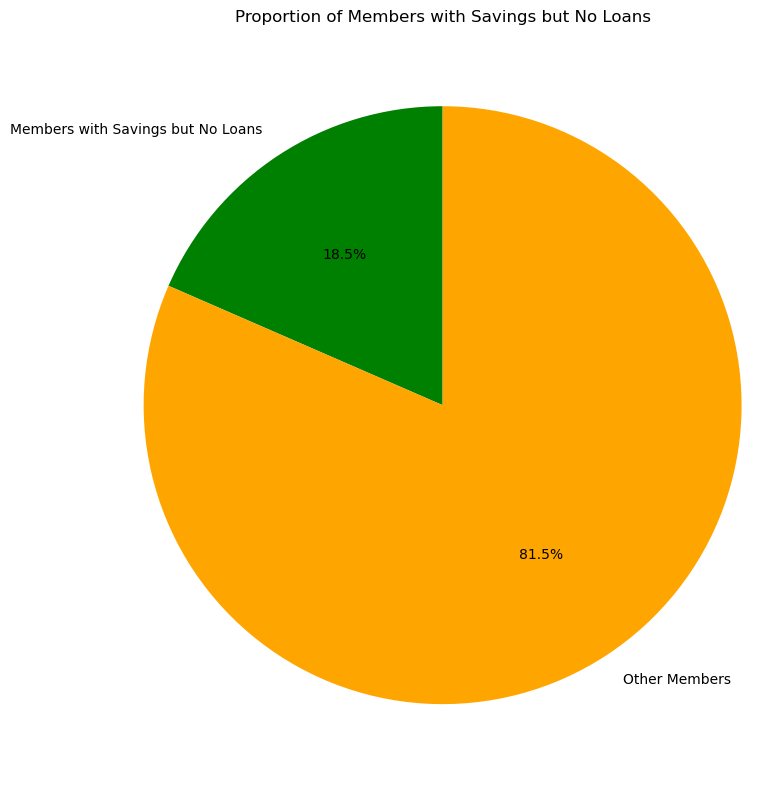

In [42]:
# Prepare the data for the pie chart
labels = ['Members with Savings but No Loans', 'Other Members']
sizes = [num_members_with_savings_but_no_loans, total_members - num_members_with_savings_but_no_loans]
colors = ['green', 'orange']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Proportion of Members with Savings but No Loans')

# Show the plot
plt.tight_layout()
plt.show()